# Credit Risk Analysis

data source : https://www.kaggle.com/datasets/laotse/credit-risk-dataset

| Feature Name                 | Description                               |
|------------------------------|-------------------------------------------|
| person_age                   | Age                                       |
| person_income                | Annual Income                             |
| person_home_ownership        | Home ownership                            |
| person_emp_length            | Employment length (in years)              |
| loan_intent                  | Loan intent                               |
| loan_grade                   | Loan grade                                |
| loan_amnt                    | Loan amount                               |
| loan_int_rate                | Interest rate                             |
| loan_status                  | Loan status (0 is non default, 1 is default) |
| loan_percent_income          | Percent income                            |
| cb_person_default_on_file    | Historical default                        |
| cb_preson_cred_hist_length   | Credit history length                     |

In [3]:
# Install library
#!pip install kagglehub

You should consider upgrading via the 'C:\Users\KATANA\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


## Import Library and Setting

In [4]:
# Import Library
import pandas as pd
import numpy as np
import seaborn as sns
import kagglehub
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
import os

# Checking library version
print("---Library version---", end = '\n')
print('pandas version: ', pd.__version__)
print('numpy version: ', np.__version__)
print('seaborn version: ', sns.__version__)
print('matplotlib version: ', mpl.__version__, end = '\n\n')

---Library version---
pandas version:  2.2.2
numpy version:  1.26.3
seaborn version:  0.13.2
matplotlib version:  3.9.2



In [5]:
# Setting library
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

mpl.font_manager.fontManager.addfont("fonts\Sarabun-Regular.ttf")
mpl.rc('font', family='Sarabun')
plt.rcParams ['font.family'] = ('Sarabun')

# ignore warnings
warnings.filterwarnings('ignore')

In [7]:
# Print current working directory
print("---Working Directory---", end = '\n')
print('List of Directory:', os.listdir(os.getcwd()))
print('List of Directory (Data):', os.listdir(os.getcwd() + '\\data'))

---Working Directory---
List of Directory: ['.ipynb_checkpoints', 'Analytic_template.ipynb', 'data', 'Explore.ipynb', 'fonts']
List of Directory (Data): ['credit_risk_dataset.csv']


## Import Data

In [9]:
source_name = "credit_risk_dataset.csv"

data = pd.read_csv(filepath_or_buffer=f'data/{source_name}')

with pd.option_context('display.max_rows', 10):
    display(data)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [11]:
print(f'Records: {data.shape[0]}, Variable: {data.shape[1]}')

Records: 32581, Variable: 12


## Overall of Data

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [14]:
data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


## Rename Columns

In [17]:
df = data.rename(columns=lambda x: x.replace("person_", "").title())
display(df)

,Age,Income,Home_Ownership,Emp_Length,Loan_Intent,Loan_Grade,Loan_Amnt,Loan_Int_Rate,Loan_Status,Loan_Percent_Income,Cb_Default_On_File,Cb_Cred_Hist_Length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


## Change Columns Type

In [25]:
df["Emp_Length"] = df["Emp_Length"].astype("Int64")

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  32581 non-null  int64  
 1   Income               32581 non-null  int64  
 2   Home_Ownership       32581 non-null  object 
 3   Emp_Length           31686 non-null  Int64  
 4   Loan_Intent          32581 non-null  object 
 5   Loan_Grade           32581 non-null  object 
 6   Loan_Amnt            32581 non-null  int64  
 7   Loan_Int_Rate        29465 non-null  float64
 8   Loan_Status          32581 non-null  int64  
 9   Loan_Percent_Income  32581 non-null  float64
 10  Cb_Default_On_File   32581 non-null  object 
 11  Cb_Cred_Hist_Length  32581 non-null  int64  
dtypes: Int64(1), float64(2), int64(5), object(4)
memory usage: 3.0+ MB


## Check Missing or NaN value

In [30]:
for i in df.columns:
    print(f'{i} : {df[i].isna().sum()}')

Age : 0
Income : 0
Home_Ownership : 0
Emp_Length : 895
Loan_Intent : 0
Loan_Grade : 0
Loan_Amnt : 0
Loan_Int_Rate : 3116
Loan_Status : 0
Loan_Percent_Income : 0
Cb_Default_On_File : 0
Cb_Cred_Hist_Length : 0


In [31]:
print('Object columns with contain NaN values', end='\n\n')
for column in df.columns:
    if df[column].dtype == 'O' and df[column].isna().any():
        print(f"NaN in : '{column}'")
    else:
        print("None")

Object columns with contain NaN values

None
None
None
None
None
None
None
None
None
None
None
None


## Analysis and Understand insight of the Data

In [32]:
data.corr(numeric_only=True)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.173202,0.163106,0.050787,0.012580,-0.021629,-0.042411,0.859133
person_income,0.173202,1.000000,0.134268,0.266820,0.000792,-0.144449,-0.254471,0.117987
person_emp_length,0.163106,0.134268,1.000000,0.113082,-0.056405,-0.082489,-0.054111,0.144699
loan_amnt,0.050787,0.266820,0.113082,1.000000,0.146813,0.105376,0.572612,0.041967
loan_int_rate,0.012580,0.000792,-0.056405,0.146813,1.000000,0.335133,0.120314,0.016696
loan_status,-0.021629,-0.144449,-0.082489,0.105376,0.335133,1.000000,0.379366,-0.015529
loan_percent_income,-0.042411,-0.254471,-0.054111,0.572612,0.120314,0.379366,1.000000,-0.031690
cb_person_cred_hist_length,0.859133,0.117987,0.144699,0.041967,0.016696,-0.015529,-0.031690,1.000000


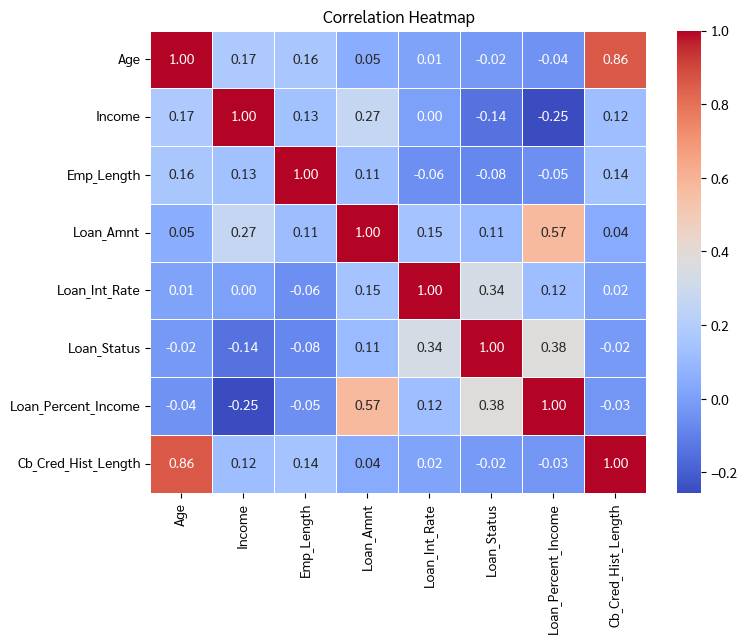

In [34]:
# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()